In [1]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
import time
import torch
import matplotlib.pyplot as plt

In [2]:
in_dim = 1
class FullyConnected(nn.Module):
    def __init__(self):
        super(FullyConnected, self).__init__()
        self.hidden1 = nn.Linear(in_dim,3)
        self.hidden2 = nn.Linear(3,3)
        self.hidden3 = nn.Linear(3,1)

    def forward(self, x):
        x = F.sigmoid( self.hidden1(x))
        x = F.sigmoid( self.hidden2(x))
        x = self.hidden3(x)
        return x


In [3]:
def unkown_function(x):
  return 5*x[0]**3 + 99*x[0]**2 + x[0]#+x[1]**3+x[2] 

In [4]:
x_train = torch.tensor([np.random.normal(scale=1,size=in_dim) for i in range(1000000)])

In [5]:
y_train = torch.tensor(list(map(unkown_function,x_train)))

In [6]:
x_test = torch.tensor([np.random.normal(size=in_dim) for i in range(1000)])
y_test = torch.tensor(list(map(unkown_function,x_test)))
FC = FullyConnected().cuda()
optimizer = optim.SGD(FC.parameters(), lr=0.05, momentum=0.9)
criterion = nn.MSELoss()
epocs = 10000

for j in range (epocs):
    a= time.time()
    output = FC(x_train.float().cuda())
    loss = criterion(output.reshape(y_train.shape), y_train.float().cuda())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    b = time.time()
    if j % 100 == 0 :
      print ("loss: {} step took {}".format(loss,b-a))
      test_output = FC(x_test.float().cuda())
      test_loss = criterion(test_output.reshape(y_test.shape), y_test.float().cuda())
      print ("test loss: {}".format(test_loss))

AssertionError: 
The NVIDIA driver on your system is too old (found version 10000).
Please update your GPU driver by downloading and installing a new
version from the URL: http://www.nvidia.com/Download/index.aspx
Alternatively, go to: https://pytorch.org to install
a PyTorch version that has been compiled with your version
of the CUDA driver.

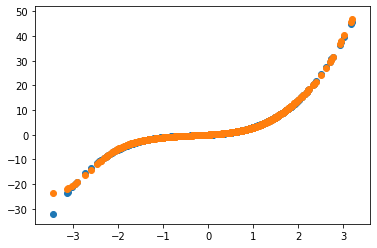

In [0]:
plt.scatter(x_test, y_test)
plt.scatter(x_test,test_output.cpu().detach().numpy())

In [0]:
x_train

tensor([[-0.3547],
        [-0.2021],
        [ 1.5904],
        ...,
        [ 1.1332],
        [-1.5038],
        [ 0.1919]], dtype=torch.float64)